# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
data_file = "cities.csv"
cities_df = pd.read_csv('cities.csv')

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
cities_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [3]:
cities_df['City'].count()

548

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#The Url
weather_api_key = "2b91ab9b738574bd54fa1f8fe17e2fd6"
url = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# initiating the record counts
record_count = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")


for city in cities:  
    
    # Try statement to append values when its found
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record_count} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase records by one 
        record_count= record_count + 1
        
        # Wait a second in loop to not over exceed rate limit of API #find this online
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Busselton
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=busselton
Processing Record 2 | Ushuaia
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=ushuaia
City not found. Skipping...
Processing Record 3 | Avarua
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=avarua
Processing Record 4 | Vaini
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=vaini
Processing Record 5 | Coos Bay
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=coos bay
Processing Record 6 | Aktobe
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=aqtobe
Processing Record 7 | Ulaanbaatar
https://api.openweathermap.org/

Processing Record 56 | Cape Town
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=cape town
Processing Record 57 | Maceio
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=maceio
Processing Record 58 | Upernavik
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=upernavik
Processing Record 59 | Kisarazu
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=kisarazu
Processing Record 60 | Rosarito
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=rosarito
Processing Record 61 | Banda Aceh
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=banda aceh
Processing Record 62 | Usinsk
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17

Processing Record 111 | Fairbanks
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=fairbanks
Processing Record 112 | Yellowknife
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=yellowknife
Processing Record 113 | Lebu
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=lebu
Processing Record 114 | Umm Lajj
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=umm lajj
Processing Record 115 | Alofi
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=alofi
Processing Record 116 | Lujan
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=lujan
Processing Record 117 | Tasiilaq
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q

Processing Record 167 | Bambous Virieux
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=bambous virieux
Processing Record 168 | Umm Bab
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=umm bab
Processing Record 169 | Aklavik
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=aklavik
Processing Record 170 | Vardo
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=vardo
Processing Record 171 | Levice
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=leua
Processing Record 172 | Aborlan
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=aborlan
Processing Record 173 | Kaitangata
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8f

Processing Record 223 | Yatou
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=yatou
Processing Record 224 | Atar
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=atar
Processing Record 225 | Paeroa
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=paeroa
Processing Record 226 | Shubarkuduk
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=shubarkuduk
Processing Record 227 | Baruun-Urt
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=baruun-urt
Processing Record 228 | Great Yarmouth
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=great yarmouth
City not found. Skipping...
Processing Record 229 | Saint Anthony
https://api.openweathermap.org/data/2.5/weather?units=

Processing Record 278 | Batagay-Alyta
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=batagay-alyta
Processing Record 279 | Cedar City
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=cedar city
Processing Record 280 | Yulara
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=yulara
Processing Record 281 | Soyo
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=soyo
Processing Record 282 | Beringovskiy
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=beringovskiy
Processing Record 283 | Port-Gentil
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=port-gentil
Processing Record 284 | Ossora
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b

Processing Record 334 | Chipinge
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=chipinge
City not found. Skipping...
Processing Record 335 | Broome
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=broome
Processing Record 336 | Bereda
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=bereda
Processing Record 337 | Hanzhong
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=hanzhong
Processing Record 338 | Diamantino
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=diamantino
Processing Record 339 | Adiake
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=adiake
Processing Record 340 | Cabinda
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b9

Processing Record 390 | Mandan
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=mandan
City not found. Skipping...
Processing Record 391 | Sorland
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=sorland
Processing Record 392 | Hwange
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=hwange
Processing Record 393 | Paamiut
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=paamiut
Processing Record 394 | Julfa
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=culfa
Processing Record 395 | Ust'-Kulom
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=ust-kulom
Processing Record 396 | Boa Vista
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b

Processing Record 445 | Atambua
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=atambua
Processing Record 446 | Turukhansk
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=turukhansk
Processing Record 447 | Aksarka
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=aksarka
Processing Record 448 | Thibodaux
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=thibodaux
Processing Record 449 | Sao Borja
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=sao borja
Processing Record 450 | Quelimane
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=quelimane
Processing Record 451 | Tautira
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd5

Processing Record 501 | Sinnamary
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=sinnamary
Processing Record 502 | Westport
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=westport
Processing Record 503 | Alihe
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=alihe
Processing Record 504 | Lethem
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=lethem
Processing Record 505 | Orocue
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=orocue
Processing Record 506 | Bambanglipuro
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17e2fd6&q=bambanglipuro
Processing Record 507 | Kihei
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b91ab9b738574bd54fa1f8fe17

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_data_df = pd.DataFrame({
    
    "city": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})

In [12]:
weather_data_df.head()

,city,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,28,AU,1582092503,14,-33.65,115.33,93.99,14.72
1,Ushuaia,75,AR,1582092432,81,-54.80,-68.30,46.40,28.86
2,Avarua,100,CK,1582092497,83,-21.21,-159.78,80.60,8.05
3,Vaini,40,TO,1582092513,78,-21.20,-175.20,78.80,8.05
4,Coos Bay,1,US,1582092549,93,43.37,-124.22,44.01,6.44


In [13]:
weather_data_df.count()

city          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64

In [15]:
# output data to csv
weather_data_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

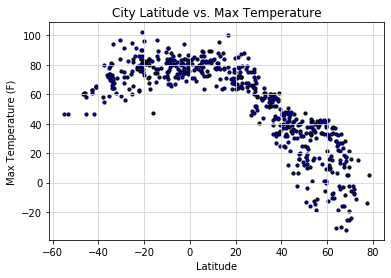

In [16]:
plt.scatter(weather_data_df["Lat"],weather_data_df["Max Temp"], marker="o", s=10, edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures_Max_Temp_vs_Latitude.png")
plt.show()

#### Latitude vs. Humidity Plot

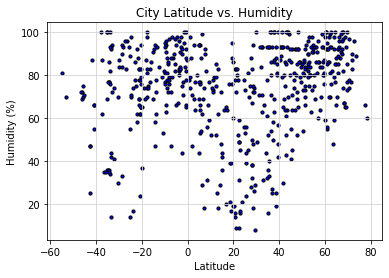

In [17]:
plt.scatter(weather_data_df["Lat"],weather_data_df["Humidity"], marker="o", s=10, edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures_Humidity_vs_Latitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

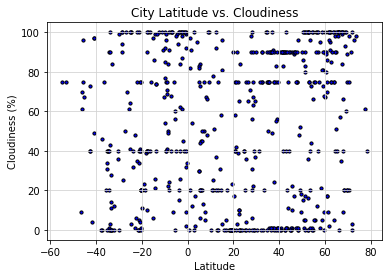

In [18]:
plt.scatter(weather_data_df["Lat"],weather_data_df["Cloudiness"], marker="o", s=10, edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures_Cloudiness_vs_Latitude.png")
plt.show()

#### Latitude vs. Wind Speed Plot

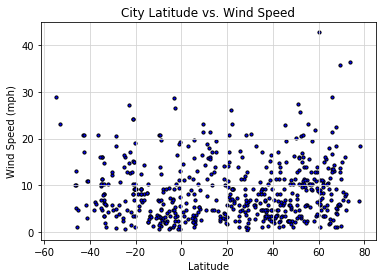

In [19]:
plt.scatter(weather_data_df["Lat"],weather_data_df["Wind Speed"], marker="o", s=10, edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures_Wind Speed_vs_Latitude.png")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [23]:
# Create Northern and Southern Hemisphere DataFrames

northern_hmspr = weather_data_df.loc[weather_data_df["Lat"]> 0.00]
southern_hmspr = weather_data_df.loc[weather_data_df["Lat"]< 0.00]


In [24]:
northern_hmspr.head()

,city,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
4,Coos Bay,1,US,1582092549,93,43.37,-124.22,44.01,6.44
5,Aktobe,86,KZ,1582092550,73,50.28,57.21,24.80,20.13
6,Ulaanbaatar,75,MN,1582092495,52,47.91,106.88,19.40,4.81
7,Kapaa,75,US,1582091960,78,22.08,-159.32,75.20,23.04
8,George Town,20,MY,1582092432,66,5.41,100.34,89.60,3.36


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

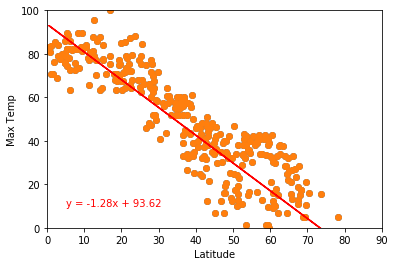

<Figure size 432x288 with 0 Axes>

In [57]:
# compare Max Temp vs. Latitude factors in the Northern Hemisphere data frame
x_values = northern_hmspr['Lat']
y_values = northern_hmspr['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=10,color="red")

plt.ylim(0,100)
plt.xlim(0,90)
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

plt.savefig("NH Max Temp Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [37]:
southern_hmspr.head()

,city,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,28,AU,1582092503,14,-33.65,115.33,93.99,14.72
1,Ushuaia,75,AR,1582092432,81,-54.80,-68.30,46.40,28.86
2,Avarua,100,CK,1582092497,83,-21.21,-159.78,80.60,8.05
3,Vaini,40,TO,1582092513,78,-21.20,-175.20,78.80,8.05
12,Hobart,40,AU,1582092562,47,-42.88,147.33,63.00,20.80


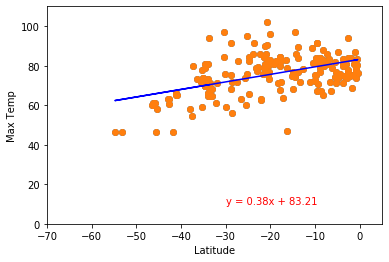

<Figure size 432x288 with 0 Axes>

In [58]:
x_values = southern_hmspr['Lat']
y_values = southern_hmspr['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"blue")

plt.annotate(line_eq,(-30,10),fontsize=10,color="red")

plt.ylim(0,110)
plt.xlim(-70,5)

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

plt.savefig("SH Max Temp Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

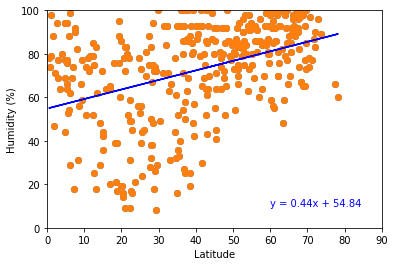

<Figure size 432x288 with 0 Axes>

In [74]:
x_values = northern_hmspr['Lat']
y_values = northern_hmspr['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"blue")
plt.annotate(line_eq,(60,10),fontsize=10,color="blue")

plt.ylim(0,100)
plt.xlim(0,90)
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

plt.savefig(" NH Humidity Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

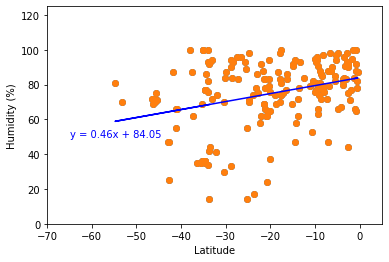

<Figure size 432x288 with 0 Axes>

In [73]:
x_values = southern_hmspr['Lat']
y_values = southern_hmspr['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"blue")
plt.annotate(line_eq,(-65, 50),fontsize=10,color="blue")

plt.ylim(0,125)
plt.xlim(-70,5)
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

plt.savefig(" SH Humidity Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

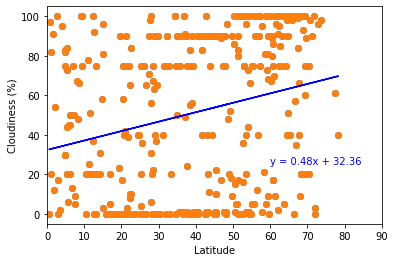

<Figure size 432x288 with 0 Axes>

In [96]:
x_values = northern_hmspr['Lat']
y_values = northern_hmspr['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"blue")
plt.annotate(line_eq,(60, 25),fontsize=10,color="blue")

plt.ylim(-5,105)
plt.xlim(0,90)
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

plt.savefig(" NH Cloudiness Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

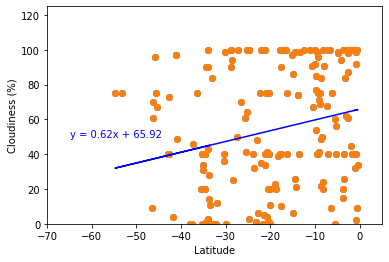

<Figure size 432x288 with 0 Axes>

In [75]:
x_values = southern_hmspr['Lat']
y_values = southern_hmspr['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"blue")
plt.annotate(line_eq,(-65, 50),fontsize=10,color="blue")

plt.ylim(0,125)
plt.xlim(-70,5)
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

plt.savefig(" SH Cloudiness Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

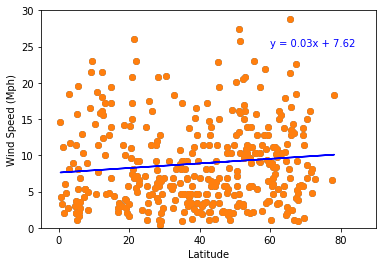

<Figure size 432x288 with 0 Axes>

In [91]:
x_values = northern_hmspr['Lat']
y_values = northern_hmspr['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"blue")
plt.annotate(line_eq,(60, 25),fontsize=10,color="blue")

plt.ylim(0,30)
plt.xlim(-5,90)
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (Mph)')
plt.show()

plt.savefig("NH Wind Speed Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

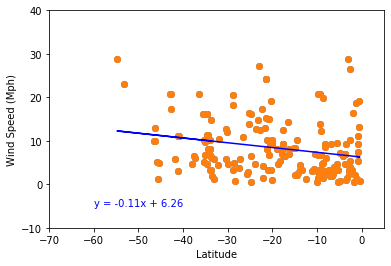

<Figure size 432x288 with 0 Axes>

In [90]:
x_values = southern_hmspr['Lat']
y_values = southern_hmspr['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"blue")
plt.annotate(line_eq,(-60, -5),fontsize=10,color="blue")

plt.ylim(-10,40)
plt.xlim(-70,5)
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (Mph)')
plt.show()

plt.savefig("SH Wind Speed Latitude Linear Regression.png")